In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df=pd.read_csv("movies.csv")

In [4]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [8]:
df.shape

(7668, 15)

In [9]:
df.isnull().any(axis=1)


0       False
1       False
2       False
3       False
4       False
        ...  
7663     True
7664     True
7665     True
7666     True
7667     True
Length: 7668, dtype: bool

In [10]:
print("Count of columns in the data is:",len(df.columns))


Count of columns in the data is: 15


In [11]:
print("count of rows in the data is:",len(df))

count of rows in the data is: 7668


In [12]:
def get_title_from_index(index):
    return df[df.index == index]['name'].values[0]

def get_index_from_title(name):
    return df[df.name == name].index.values[0]

In [13]:
features =['name','genre','director']

In [14]:
for feature in features:
    df[feature]=df[feature].fillna('')

In [15]:
df['name'].isnull().sum()

0

In [16]:
df['genre'].isnull().sum()

0

In [17]:
df['combined_features']=df.apply(lambda row:row['name']+'|'+row['genre']+'|'+row['director'],axis=1)
                                 
                                 

In [18]:
df.combined_features

0                       The Shining|Drama|Stanley Kubrick
1                The Blue Lagoon|Adventure|Randal Kleiser
2       Star Wars: Episode V - The Empire Strikes Back...
3                           Airplane!|Comedy|Jim Abrahams
4                          Caddyshack|Comedy|Harold Ramis
                              ...                        
7663                     More to Life|Drama|Joseph Ebanks
7664                      Dream Round|Comedy|Dusty Dukatz
7665                     Saving Mbango|Drama|Nkanya Nkwai
7666                     It's Just Us|Drama|James Randall
7667                        Tee em el|Horror|Pereko Mosia
Name: combined_features, Length: 7668, dtype: object

In [19]:
vectorizer=CountVectorizer()
feature_matrix=vectorizer.fit_transform(df['combined_features'])

In [20]:
cosine_similarities=cosine_similarity(feature_matrix)
print(cosine_similarities)

[[1.         0.18257419 0.14142136 ... 0.2        0.18257419 0.        ]
 [0.18257419 1.         0.12909944 ... 0.         0.         0.        ]
 [0.14142136 0.12909944 1.         ... 0.         0.         0.        ]
 ...
 [0.2        0.         0.         ... 1.         0.18257419 0.        ]
 [0.18257419 0.         0.         ... 0.18257419 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [21]:
df[['name','genre','director']].head(20)

,name,genre,director
0,The Shining,Drama,Stanley Kubrick
1,The Blue Lagoon,Adventure,Randal Kleiser
2,Star Wars: Episode V - The Empire Strikes Back,Action,Irvin Kershner
3,Airplane!,Comedy,Jim Abrahams
4,Caddyshack,Comedy,Harold Ramis
5,Friday the 13th,Horror,Sean S. Cunningham
6,The Blues Brothers,Action,John Landis
7,Raging Bull,Biography,Martin Scorsese
8,Superman II,Action,Richard Lester
9,The Long Riders,Biography,Walter Hill


In [22]:
# Taking input from user
movie_user_likes= input("\nEnter a movie that you liked:")

# getting the index of the movie that the user Likes
movie_index = get_index_from_title(movie_user_likes)
# getting similar all movies of the movie that the user tikes
similar_movies= list(enumerate(cosine_similarities [movie_index]))

# sorting similar movies by similarity score in descending order
sorted_similar_movies= sorted(similar_movies, key=lambda x: x[1],reverse=True)[1:]

# print the top 5 simitar movies
print("\nTop 5 similar movies to "+movie_user_likes+" are: \n")
i=0
for element in sorted_similar_movies:
    print( get_title_from_index(element[0]))
    i = i+1
    if i>=5:
        break


Enter a movie that you liked: Fame



Top 5 similar movies to Fame are: 

Birdy
Shoot the Moon
Pink Floyd: The Wall
Come See the Paradise
Rollover


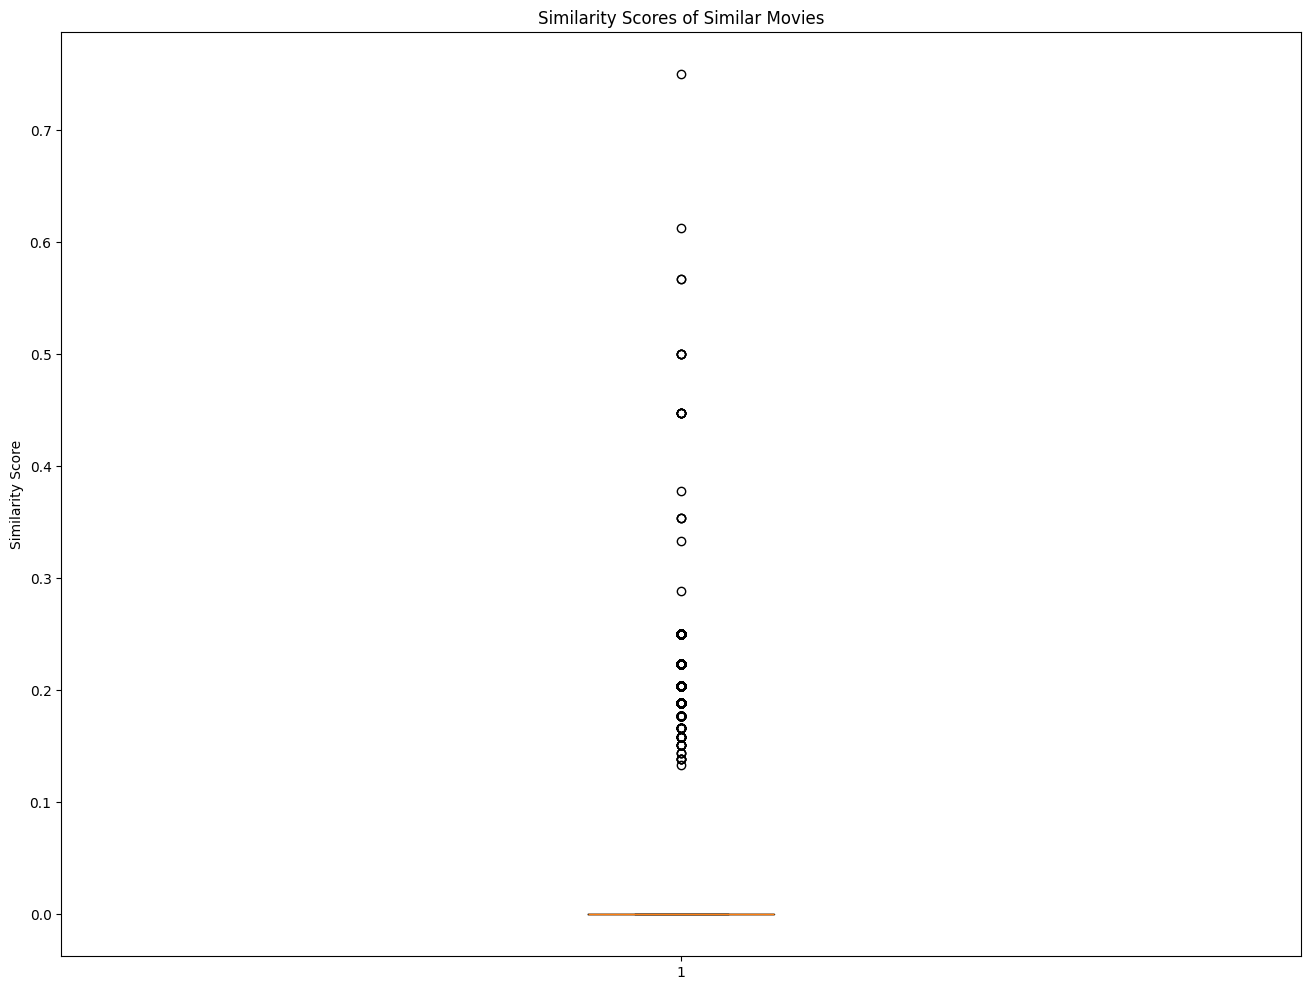

In [35]:
similarity_scores = [element[1] for element in sorted_similar_movies]
plt.figure(figsize=(16, 12))
plt.boxplot(similarity_scores)
plt.title('Similarity Scores of Similar Movies')
plt.ylabel('Similarity Score')
plt.show()

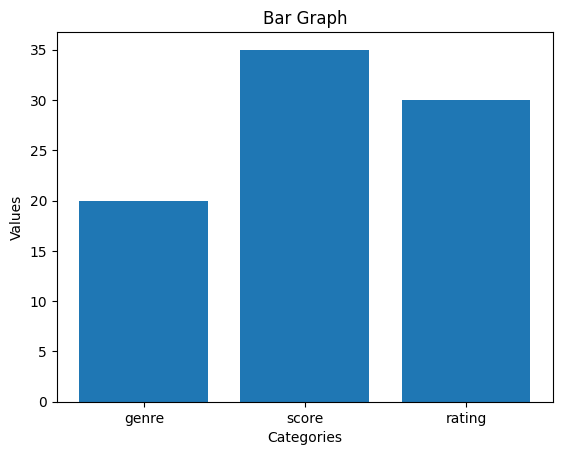

In [37]:
import matplotlib.pyplot as plt

categories = ['genre', 'score', 'rating']
values = [20, 35, 30, ]
plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Graph')
plt.show()


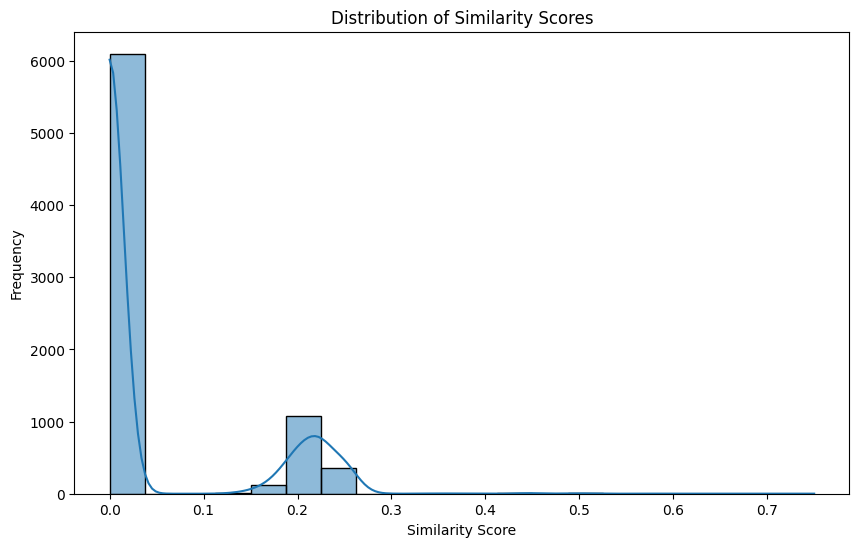

In [38]:
similarity_scores = [element[1] for element in sorted_similar_movies]
plt.figure(figsize=(10, 6))
sns.histplot(similarity_scores, bins=20, kde=True)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()